### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write-up, download this file as a PDF or HTML file, upload that PDF/HTML into the workspace here (click on the orange Jupyter icon in the upper left then Upload), then use the Submit Project button at the bottom of this page. This will create a zip file containing both this .ipynb doc and the PDF/HTML doc that will be submitted for your project.


(1) What is the independent variable? What is the dependent variable?

>**Answer 1:** <br>
The dataset contains time durations for executing the Stroop Task, consisting in reading out loud the color of the ink in which a word is written.<br> The words used for the Stroop Task are color names. When the name of the ink and the word matches, the task is said to be **Congruent** (example: nominating the ink color black when the word is **BLACK**), while when they differ the task is said  **Incongruent** (like the nominating  the color black but the word is instead **RED**). <br>
In this case the independent variable is the type of the test performed (Congruent or Incongruent), while the dependent variable is the time for executing the test, which may or not may vary in response to the kind of test: this is what we should decide with our test.

(2) What is an appropriate set of hypotheses for this task? Specify your null and alternative hypotheses, and clearly define any notation used. Justify your choices.

>**Answer 2 a:**  <br>
An appropriate null hypothesis for the Stroop Task is that the mean time of execution of the task doesn't vary for Congruent and Incogruent tasks, while the alternative hypothesis is that they differ. <br>
Defining the mean time for the Congruent Stroop Task as $\mu_{c}$ and the mean time for the Incongruent task as $\mu_{i}$, the null and alternative hypotesis can be defined as follows:

$$ H_0: \mu{i}  - \mu{c} = 0 $$
$$ H_1: \mu_{i}  - \mu{c} \neq 0 $$

>**Answer 2 b ** :<br>
>A good way to test the above hypothesis is to perform a paired two-tailed t-test: this kind of test is useful when examining data relative to the same individuals in two different conditions, like the same group of students in two different exams. In particular in this case I'll use the the scipy.stats.ttest_rel function (here the documentation: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html)<br>
This kind of test requires a series of **assumptions**: <br>
<ul>
<li> The dependent variable is a quantitative continuous measure.
<li> The pairs are independent one from another, meaning in this case that the times recorded for each individual are independent of the times for another individual (clearly the times for the Congruent and Incongruent task in the case of the same individual cannot be independent one from another) and the samples are random (in our case we assume that the individuals involved in the experiment have been chosen at random).
<li>There aren't outliers.</li>
<li>The distribution of the mean differences  in the population from which the samples have been drawn is normal.
</ul>

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [150]:
# Perform the analysis here
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [151]:
df = pd.read_csv('stroopdata.csv')

In [152]:
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [153]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
Congruent      24 non-null float64
Incongruent    24 non-null float64
dtypes: float64(2)
memory usage: 464.0 bytes
None


In [154]:
print(df.describe())

       Congruent  Incongruent
count  24.000000    24.000000
mean   14.051125    22.015917
std     3.559358     4.797057
min     8.630000    15.687000
25%    11.895250    18.716750
50%    14.356500    21.017500
75%    16.200750    24.051500
max    22.328000    35.255000


In [155]:
# times for the Conguruent Stroop task
congruent = df['Congruent']
# times for the Incongruent Stroop task
incongruent = df['Incongruent']

In [156]:
# Congruent Task times mean
congruent_mean = congruent.mean()
print("Mean of Times for the Congruent Task: " + str(congruent_mean))

Mean of Times for the Congruent Task: 14.051125000000004


In [157]:
# Incongruent Task times mean
incongruent_mean = incongruent.mean()
print("Mean of Times for the Incongruent Task: " + str(incongruent_mean))

Mean of Times for the Incongruent Task: 22.01591666666667


In [158]:
print("Minimum Time for the Congruent Task: " + str(congruent.min()))

Minimum Time for the Congruent Task: 8.63


In [159]:
print("Minimum Time for the Incongruent Task: " + str(incongruent.min()))

Minimum Time for the Incongruent Task: 15.687000000000001


In [160]:
print("Median Time for the Congruent Task: " + str(congruent.median()))

Median Time for the Congruent Task: 14.3565


In [161]:
print("Median Time for the Incongruent Task: " + str(incongruent.median()))

Median Time for the Incongruent Task: 21.0175


In [162]:
#standard deviation for the congruent task
congruent_std = congruent.std()
print('Standard Deviation for Congruent Stroop Task: ' + str(congruent_std))

Standard Deviation for Congruent Stroop Task: 3.559357957645195


In [163]:
#standard deviation for the incongruent task
incongruent_std = incongruent.std()
print('Standard Deviation for Incongruent Stroop Task: ' + str(incongruent_std))

Standard Deviation for Incongruent Stroop Task: 4.797057122469138


>**Answer 3:** <br>
The Congruent Task has a mean time of about 14.05, while the Incongruent Task has higher mean time of about 22.02. <br>
The standard deviation for the congruent task is 3.56, while the Incongruent Task shows more variability with standard deviation of about 4.80. <br>
Notably the minimum time for executing the Incongruent Task is 15.69, while considering the median of the Congruent Task of 14.36, 50% of the execution times for the Congruent task are below the minimum time for the Incongruent Task. <br>

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

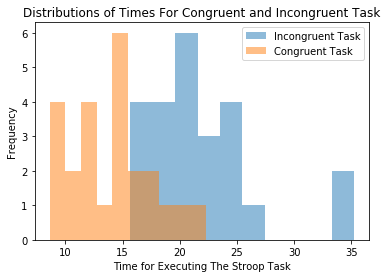

In [164]:
plt.hist(incongruent, alpha = 0.5, label = "Incongruent Task");
plt.hist(congruent, alpha = 0.5, label = "Congruent Task");
plt.legend(loc="upper right");
plt.title("Distributions of Times For Congruent and Incongruent Task");
plt.xlabel("Time for Executing The Stroop Task");
plt.ylabel("Frequency");

>**Answer 4 a: **<br>
As expected considering the statistics about the Congruent and Incongruent Task, the distribution of times for the Congruent Task is shifted towards shorter times respect to the one for Incongruent Task as illustrated by the graph above.

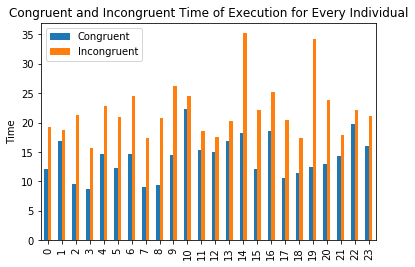

In [165]:
df.plot.bar()
plt.title("Congruent and Incongruent Time of Execution for Every Individual");
plt.ylabel("Time");

>**Answer 4 b:** <br>
Comparing side by side the times for the Congruent and Incongruent task for each individual in the graph above, is evident that for every partecipant in the experiment the times for the Congruent Task are always shorter that the one for the Incongruent Task.<br>

Text(0.5,0,'Type of Task')

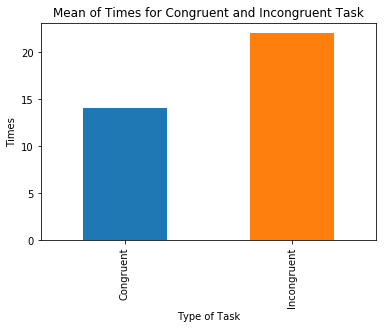

In [166]:
df.mean().plot('bar');
plt.title("Mean of Times for Congruent and Incongruent Task");
plt.ylabel("Times")
plt.xlabel("Type of Task")

>**Answer 4 c: **<br>
The last bar plot shows means for the the two task, with again the Incongruent Task requiring more time.

(5)  Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations? **Hint:**  Think about what is being measured on each individual, and what statistic best captures how an individual reacts in each environment.

In [167]:
# Perform the statistical test here
t, p_value = stats.ttest_rel(congruent, incongruent)
print("t statistics : " + str(t))
print("p-value: " + str(p_value))

t statistics : -8.020706944109957
p-value: 4.103000585711178e-08


>**Answer 5:** <br>
The paired T-test above show a p-value of 4.103e-08 and a t-statistics of -8.02. <br>
Assuming a confidence level of 95%, corresponding to an alpha value of 0.05, the p-value associated with the test is significantly less than the alpha value, showing that the probability of finding the diffences in times we observed in our data is very tiny, therefore we reject the null hypothesis: the time required for executing the Incongruent Task is significantly different from the one required for the Congruent Task, as expected from the statistics we have found in the data.

(6) Optional: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect? Some research about the problem will be helpful for thinking about these two questions!

>**Answer 6: ** <br>
According to Wikipedia, there could be several reasons for the Stroop Effect, one of these is a race condition due to the different areas of the brain involved in reading and recognizing colors: the brain is faster at reading than at recognizing colors, so the first information the brain receives is the name of the color rather than the color itself and this can cause confusion and more time for taking a decision about which word to say. <br>

>A second similar theory suggests that reading is an automate task for the brain, while recognizing colors is a voluntary task, requiring therefore more time and again causing confusion when the two informations doesn't match. <br>

>A third theory says that it isn't a question of speed in neurons or of voluntary versus involuntary tasks, but a question of strenght: for the brain reading is simply more important than recognizing colors, so the information obtained from reading is considered more important than the one from the color, causing an interference if the two informations don't match.<br>

>I like all the theories, but I favor the second (did you ever read the ingredients of the toothpaste while washing the teeth? I did), but mine is only an assumption not based on any data.

>Another similar task could involve something usually done automatically like listening, in contrast with something else that requires attention like writing or counting, for example writing a word if the number of letters of a word are even, but not if they are odd, with the words being all numbers.



**Sources used as references **: <br>
https://en.wikipedia.org/wiki/Stroop_effect <br>
https://statistics.laerd.com/stata-tutorials/paired-t-test-using-stata.php <br>
http://influentialpoints.com/Training/paired_t-test-principles-properties-assumptions.htm <br>
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html